<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [13]:
data = pd.read_excel("/content/pressure_weight.xls")
data.describe()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


In [14]:
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


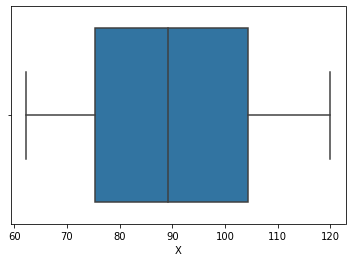

In [16]:
sns.boxplot(x=data['X'])

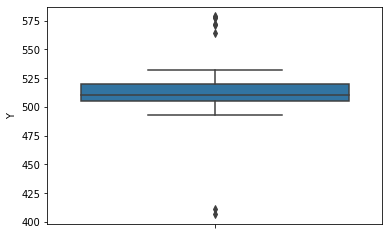

In [19]:
sns.boxplot(y=data['Y'])

In [21]:
z = np.abs(stats.zscore(data))
outliers = np.where(z >3)
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [20]:
f_data = data[(z < 3).all(axis=1)]
print(len(data))
print(len(f_data))
if(len(data) == len(f_data)):
    print('No outliners')

30
30
No outliners


In [26]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
train_data,test_data = train_test_split(data_n,test_size=0.2)
print(len(train_data))
print(len(test_data))

24
6


In [31]:
x = data.iloc[:,0]
y = data.iloc[:,1]
x = minmax_scale(x)
y = minmax_scale(y)

In [39]:
def gradient_of_m(x,y,m,c):
  sum = 0
  number_of_samples = len(x)
  for i in range(number_of_samples):
    grad_of_m_of_i = (y[i]- m*x[i] - c)*x[i]
    sum = sum + grad_of_m_of_i
  gradient_m = -1*(1/number_of_samples)*sum
  return gradient_m
def gradient_of_c(x,y,m,c):
  sum = 0
  number_of_samples = len(x)
  for i in range(number_of_samples):
    grad_of_c_of_i = (y[i]- m*x[i] - c)
    sum = sum + grad_of_c_of_i
  gradient_c = -1*(1/number_of_samples)*sum
  return gradient_c
def error(x,y,m,c):
  number_of_samples = len(x)
  for i in range(number_of_samples):
    error_value = 1*0.5*(1/number_of_samples)*math.pow((y[i] - m*x[i] - c), 2)
  return error_value

In [34]:
import math

In [42]:
learning_rate = 0.1
m = 1
c = -1
epochs = 1000
error_list = []
for i in range(epochs):
  error_list.append(error(x,y,m,c))
  delta_m = -1*learning_rate*gradient_of_m(x,y,m,c)
  delta_c = -1*learning_rate*gradient_of_c(x,y,m,c)
  m = m + delta_m
  c = c + delta_c
  print(m,c)

1.0456994477058954 -0.8855893658835742
1.0843824143944747 -0.784839407338993
1.1169364934651842 -0.6960432678636983
1.1441380280794455 -0.6177078868222854
1.1666660483686064 -0.5485272164601078
1.185114462661614 -0.48735879414265615
1.2000027214593536 -0.43320324949625594
1.211785145481677 -0.38518637878159245
1.2208590851448529 -0.3425434648910828
1.2275720578615104 -0.30460556165054253
1.232227991215938 -0.27078749634778004
1.2350926840258356 -0.24057737523798692
1.2363985832694733 -0.2135274037411625
1.23634896258294 -0.18924585663410076
1.2351215772955488 -0.1673900541718745
1.232871861579871 -0.14766021812143942
1.2297357250778083 -0.1297940974767547
1.2258319991781852 -0.1135622674339065
1.2212645768356345 -0.09876401728388624
1.216124284322271 -0.08522375344662486
1.210490518494176 -0.07278785311219257
1.2044326789477384 -0.06132191203955291
1.1980114207609518 -0.05070833713496096
1.1912797502958277 -0.040844240617892116
1.1842839837223875 -0.031639597993260986
1.177064585461746

Text(0.5, 1.0, 'error graph')

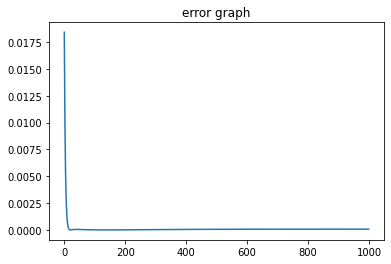

In [43]:
x_1 = range(epochs)
y_1 = error_list
plt.plot(x_1,y_1)
plt.title("error graph")

In [50]:
pressure_maximum = 120.000000
pressure_minimum = 62.200000
weight_maximum = 578.600000
weight_minimum = 406.700000
actual_pressure = float(input("enter value of pressure : "))
scaled_pressure = (actual_pressure - pressure_minimum)/(pressure_maximum-pressure_minimum)
scaled_weight = scaled_pressure*m+c
predicted_weight = scaled_weight*(weight_maximum-weight_minimum)+weight_minimum
print("The weight predicted is : ",predicted_weight)

enter value of pressure : 82.1
The weight predicted is :  519.3304530085891
